# Сборный проект

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. 

**Цель проекта:** Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**План работы:**
- Изучить общую информацию, обработать все возможных пропуски в данных, выявить причину их возникновения. 
- Провести исследовательский анализ данных: посмотреть какое количество игр было выпущено, на каких платформах, выявить актульный период исследования, изучить продажи по регионам, определить самые перспективные платформы, найти взаимосвязи между продажами и различными параметрами. 
- Определить портрет пользователя по регионам, изучить самые продаваемые жанры, выявить влияет ли рейтинг ESRB на продажи в различных регионах.
- Выдвинуть и проверить две гипотезы, написать общий вывод по выполненной работе.
- Определить, на что лучше потратить рекламный бюджет компании.

##  Откройте файл с данными и изучите общую информацию

Подключим все необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv') #прочитаем таблицу с данными

In [3]:
data.head() #выведем первые пять строк на экран

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info() #запросим общую информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

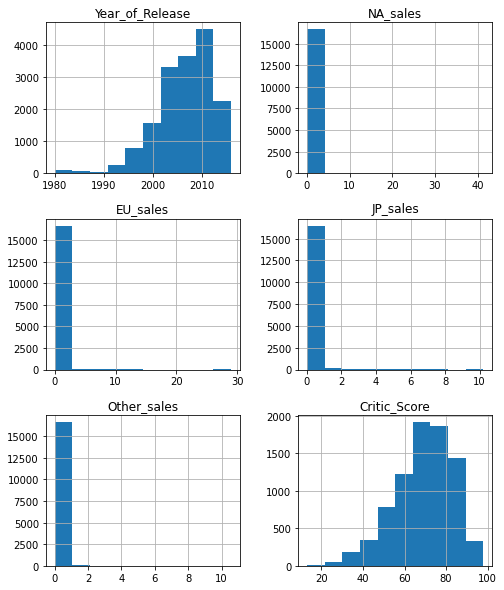

In [5]:
data.hist(figsize=(8, 10)) #построим гистограммы  для всех колонок с числовым типом

**Перед нами таблица с 11 колонками:**
-  Name — название игры
-  Platform — платформа
-  Year_of_Release — год выпуска
-  Genre — жанр игры
-  NA_sales — продажи в Северной Америке (миллионы проданных копий)
-  EU_sales — продажи в Европе (миллионы проданных копий)
-  JP_sales — продажи в Японии (миллионы проданных копий)
-  Other_sales — продажи в других странах (миллионы проданных копий)
-  Critic_Score — оценка критиков (максимум 100)
-  User_Score — оценка пользователей (максимум 10)
-  Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Предварительно мы видим список из 16 715 игр, выпущенных с 1980г. - 2016г. Больше всего продаж было в США и Европе. Самая частая оценка критиков составляет 70/100.

**Пропуски обнаружены в следующих колонках:**
1. Название игры.
2. Год выпуска.
3. Жанр. 
4. Оценка критиков
5. Оценка пользователей
6. Рейтинг от организации ESRB 

Пропуски в оценках и рейтингах скорее всего наблюдаются в ранних годах датафрейма. Так, например, организация ESRB была основаны в 1994г., в то время, как данные представлены с 1980г.
В остальных колонках пропусков мало, скорее всего был технический сбой.


## Подготовьте данные

###  Заменим названия столбцов

In [6]:
data.columns = data.columns.str.lower() #для удобства приведем названия столбцов к нижнему регистру
data.columns #проверим изменения

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

Преобразуем данные в лучший вид - используем метод ''convert_dtypes()''.

In [7]:
data = data.convert_dtypes()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  string 
 1   platform         16715 non-null  string 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  string 
 4   na_sales         16715 non-null  Float64
 5   eu_sales         16715 non-null  Float64
 6   jp_sales         16715 non-null  Float64
 7   other_sales      16715 non-null  Float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  string 
 10  rating           9949 non-null   string 
dtypes: Float64(4), Int64(2), string(5)
memory usage: 1.5 MB


На данном этапе мы видим, что только колонка `user_score` не соответствует своему типу, поскольку по условиям значения в ней могут принимать лишь числа *от 0 до 100.* Займемся ей на следующем этапе.

### Обработайте пропуски при необходимости

Выведем на экран строки с пропусками в колонках `name`, `year_of_release`, `genre`. 

In [9]:
data[data['name'].isna()] #строки с пропусками в колонке название игр

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,<NA>,GEN,1993,<NA>,1.78,0.53,0.0,0.08,<NA>,<NA>,<NA>
14244,<NA>,GEN,1993,<NA>,0.0,0.0,0.03,0.0,<NA>,<NA>,<NA>


In [10]:
data[data['year_of_release'].isna()] #строки с пропусками в колонке год реализации

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.8,0.97,0.0,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.0,0.41,<NA>,<NA>,<NA>
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.0,0.03,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.0,0.0,0.0,43,tbd,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.0,0.0,0.0,69,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.0,0.0,0.0,59,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.0,0.0,0.0,<NA>,<NA>,<NA>


In [11]:
data[data['genre'].isna()] #строки с пропусками в колонке с названием жанра

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,<NA>,GEN,1993,<NA>,1.78,0.53,0.0,0.08,<NA>,<NA>,<NA>
14244,<NA>,GEN,1993,<NA>,0.0,0.0,0.03,0.0,<NA>,<NA>,<NA>


Заметим, что номера строк с пропусками в названиях совпадают с номерами строк с пропусками в жанрах.

Все колонки важны для дальнейшего анализа, если мы удалим строки с пропусками в `name`, `year_of_release`, `genre` на результате исследования это не отразится, поскольку эти строки занимают *1,6% от всего датафрейма.* 

In [12]:
data = data.dropna(subset=['name','year_of_release']) #удалим строки с пропусками в перечисленных колонках
data.info() #проверим результат

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  string 
 1   platform         16444 non-null  string 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  string 
 4   na_sales         16444 non-null  Float64
 5   eu_sales         16444 non-null  Float64
 6   jp_sales         16444 non-null  Float64
 7   other_sales      16444 non-null  Float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       9839 non-null   string 
 10  rating           9768 non-null   string 
dtypes: Float64(4), Int64(2), string(5)
memory usage: 1.6 MB


Пропуски в **колонках с данными о рейтингах** большое количество и заполнить их другими значениями невозможно. Мы уже отмечали, что период исследования большой и присвоение какого-либо рейтинга скорее всего характерно для более поздних игр, а также, вероятно, имеет значение и страна, где были проданы копии. Вернемня к рейтингам позже.

Посмотрим, есть ли в нашей таблице полностью повторяющиеся строки.

In [13]:
data.duplicated().sum() #найдем дубликаты и посчитаем их количество

0

**Ознакомимся с уникальными значения в колонках и выявим неявные дубликаты.**

In [14]:
data['name'].value_counts()

Need for Speed: Most Wanted                       12
LEGO Marvel Super Heroes                           9
FIFA 14                                            9
Ratatouille                                        9
Monopoly                                           8
                                                  ..
Major League Baseball Featuring Ken Griffey Jr     1
Scarface: Money. Power. Respect.                   1
Psychedelica of the Black Butterfly                1
Captain Toad: Treasure Tracker                     1
Buzz Lightyear of Star Command                     1
Name: name, Length: 11426, dtype: Int64

Мы видим, что есть названия игр, которые повторяются. Посмотрим с чем это может быть связано.

In [15]:
data[data['name'] == 'Need for Speed: Most Wanted'] #выведем на экран все строки, содержащие информацию по игре Need for Speed

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,<NA>,<NA>,<NA>
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.1,83,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.0,0.05,83,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,<NA>,<NA>,<NA>
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.0,0.02,80,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.0,0.04,82,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.0,0.02,<NA>,<NA>,<NA>
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.0,0.02,45,6.1,E


Как мы видим, что повторы одной игры связаны с ее размещением на разных платформах. 
Также у Need for Speed: Most Wanted был перевыпуск в 2012г., поэтому она дублируется на некоторых платформах.
Следует отметить, что оценки пользователей, критиков могут отличаться на разных платформах, а также учитывая,что пропусков достаточно много, то заменять их медианным значением будет некорректно. 

Выведем уникальные значения в отстальных колонках.

In [16]:
data['platform'].unique() #уникальные значения платформы

<StringArray>
[ 'Wii',  'NES',   'GB',   'DS', 'X360',  'PS3',  'PS2', 'SNES',  'GBA',
  'PS4',  '3DS',  'N64',   'PS',   'XB',   'PC', '2600',  'PSP', 'XOne',
 'WiiU',   'GC',  'GEN',   'DC',  'PSV',  'SAT',  'SCD',   'WS',   'NG',
 'TG16',  '3DO',   'GG', 'PCFX']
Length: 31, dtype: string

In [17]:
data['year_of_release'].unique() #уникальные значения года реализации

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 37, dtype: Int64

In [18]:
data['genre'].unique() #уникальные значения жанра

<StringArray>
[      'Sports',     'Platform',       'Racing', 'Role-Playing',
       'Puzzle',         'Misc',      'Shooter',   'Simulation',
       'Action',     'Fighting',    'Adventure',     'Strategy']
Length: 12, dtype: string

В уникальных значениях рассмотренных трех колонок необычных значений не наблюдаем.

Обратим внимание, что колонка `ratig`, `user_score` имеют тип str. Выведем уникальные значения. 

In [19]:
data['rating'].value_counts() #уникальные значения возрастного рейтинга

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: Int64

In [20]:
data['user_score'].value_counts() #уникальные значения рейтинга пользователей

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.9       2
0.6       2
1.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: Int64

Оценки из колонки `user_score` по условиям могут принимать значения от 0 до 10. Также стоит обратить внимание, что в данной колонке встречается популярное значение *tbd*, что означает "to be determined" или "будет определненно". Скорее всего это новые игры, по которым еще не сформирован рейтинг. Для дальнейшего анализа заменим значение *tbd* на NaN, это позволит нам проводить математические операции.

In [21]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'].unique()

<StringArray>
[  '8',  <NA>, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4', '8.2',
   '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2', '8.9', '6.4',
 '7.8', '7.5', '2.6', '7.2', '9.2',   '7', '7.3', '4.3', '7.6', '5.7',   '5',
 '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1', '6.7', '5.4',   '4', '4.9',
 '4.5', '9.3', '6.2', '4.2',   '6', '3.7', '4.1', '5.8', '5.6', '5.5', '4.4',
 '4.6', '5.9', '3.9', '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5',
 '1.9',   '3', '2.7', '2.2',   '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8',
   '0', '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
 '0.5', '1.3', '0.2', '0.6', '1.4', '0.9',   '1', '9.7']
Length: 96, dtype: string

In [22]:
data['user_score'] = data['user_score'].astype(float) #заменим тип данных на float
data['user_score'].dtypes #проверим

dtype('float64')

Колонка `rating` сформирована из оценок *Entertainment Software Rating Board*. Внимательно ознакомившись с системой оценок ESRB, можно увидеть неявный дубликат. «E» («Everyone») до 1999г. эта оценка имела название "K-A" ("Kids to Adults"). Заменим значение *К-А* на *Е*.

In [23]:
data['rating'] = data['rating'].replace('K-A', 'E') #заменим К-А на Е
data['rating'].value_counts() #проверирим уникальные значения

E       3924
T       2905
M       1536
E10+    1393
EC         8
RP         1
AO         1
Name: rating, dtype: Int64

Проверим корректность значений колонки `critic_score`. Из условий оценки должны принимать значение от 0 до 100.

In [24]:
data.loc[(data['critic_score'] < 0) & (data['critic_score'] > 100)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [25]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1) #сложим продажи по всем странам
data.head() #выведем первые 5 строк

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,<NA>,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.0,<NA>,NaN,<NA>,31.38


In [26]:
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,<NA>,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.0,<NA>,NaN,<NA>,31.38
5,Tetris,GB,1989,Puzzle,23.2,2.26,4.22,0.58,<NA>,NaN,<NA>,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,<NA>,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,<NA>,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.0,0.0,0.01,0.0,<NA>,NaN,<NA>,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.0,0.01,0.0,0.0,<NA>,NaN,<NA>,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.0,0.0,0.01,0.0,<NA>,NaN,<NA>,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.0,0.0,0.0,<NA>,NaN,<NA>,0.01


Пропуски в названии игр, жанре и в годе ее реализации скорее всего произошли при техническом сбое.

Пропуски в оценках пользователей и критиков могут произойти по причине, что этот рейтинг не был сформирован. Например, в играх с ранним годом выпуска могли не проводить исследования по сбору оценок. Или же оценок было мало, что не позволило сформировать рейтинг. Также возможно, что игра новая и по ней не успели собрать данные. Еще одной причиной может послужить то, что оценок критиков по игре нет, потому что она была "неинтересна" обозревателям.

Пропуски в рейтинге ESBR могут говорить о том, что данная рейтинговая система не соответствует региону выпуска игры. ESBR американская система оценок, помимо нее существуют европейская, японская и др.


In [27]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  string 
 1   platform         16444 non-null  string 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  string 
 4   na_sales         16444 non-null  Float64
 5   eu_sales         16444 non-null  Float64
 6   jp_sales         16444 non-null  Float64
 7   other_sales      16444 non-null  Float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   string 
 11  total_sales      16444 non-null  float64
dtypes: Float64(4), Int64(2), float64(2), string(4)
memory usage: 1.7 MB
None
-------------------------
name <StringArray>
[                        ' Beyblade Burst',
                      ' Fire Emblem Fates',
                   " Frozen: Olaf's 

##  Проведите исследовательский анализ данных

###  Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [28]:
data_years = data.groupby('year_of_release')['name'].count() #сгруппируем данные по годам и посчитаем кол-во выпущенных игр на всех платформах

<AxesSubplot:title={'center':'Выпуск игр по годам'}, xlabel='Год реализации', ylabel='Кол-во выпущенных игр'>

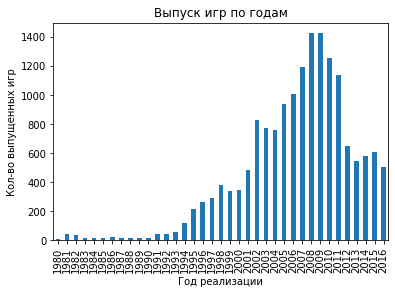

In [29]:
data_years.plot(kind='bar',xlabel='Год реализации',ylabel='Кол-во выпущенных игр',title='Выпуск игр по годам') #построим график для наглядности

На графике видно, что в 2008 и 2009 гг. было выпущено наибольшее число игр (размещено на платформах). В 2008 году случился ипотечный кризис, который потянул за собой в том числе и игровую индустрию, для каких-то проектов было сокращено финансирование, какие-то проекты были заморожены. Это лишь одна из возможных причин. За последние 10 лет исследуемого периода 2016г. показал самое наименьшее число размещенных игр.


Посмотрим сколько копий продавалось в разные годы.

<AxesSubplot:title={'center':'Продажи игр по годам'}, xlabel='Год реализации', ylabel='Суммарные продажи'>

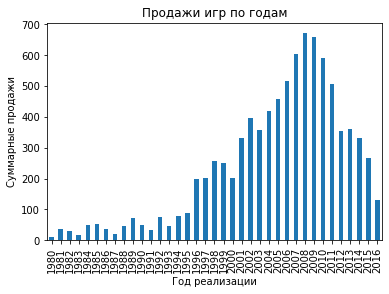

In [30]:
data_years_sales = data.groupby('year_of_release')['total_sales'].sum() #сгруппируем 
data_years_sales.plot(kind='bar',xlabel='Год реализации',ylabel='Суммарные продажи',title='Продажи игр по годам')

В целом оба графика имеют схожие тенденции. 

Для составления плана на 2017 год нам важны данные только за последние годы. Для определения актуального периода определим жизненный цикл платформ, также выберем платформы, которые приносят прибыль.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Построим сводную таблицу, в которой отразим объем продаж на платформах по годам.

In [31]:
pd.set_option('display.max_columns',None)
data.pivot_table(index='platform',columns='year_of_release',values='name',aggfunc='count')

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2600,9.0,46.0,36.0,11.0,1.0,1.0,2.0,6.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.0,93.0,91.0,80.0,86.0,46.0
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,14.0,20.0,8.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,118.0,201.0,376.0,492.0,403.0,323.0,153.0,23.0,8.0,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,3.0,9.0,7.0,NaN,3.0,4.0,6.0,8.0,8.0,11.0,17.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,107.0,198.0,150.0,175.0,135.0,39.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,152.0,144.0,83.0,97.0,40.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,6.0,7.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В данном случае пропуски в данных в сводной таблице могут помочь нам увидеть, в какие годы продаж на платформах не было, то есть какие платформы появились недавно и какие прекратили свое существование. Так например, PlayStation Vita (PSV) — портативная консоль от Sony Computer Entertainment была выпущена в Японии 17 декабря 2011, соответственно, данные о продажах в таблице отражены с 2011 года.

Также благодаря пропускам и заполненным значениям мы можем увидеть, что в данных была ошибка. Так платформа DS, выпущенная в 2004 году не могла продавать игры в 1985 году.Однако на результатах исследования это не отразится.

Выведем уникальные года у одних для одних из самых известных консолей:

In [32]:
print(data[data['platform'] == 'PS3']['year_of_release'].unique())
print(data[data['platform'] == 'X360']['year_of_release'].unique())
print(data[data['platform'] == 'Wii']['year_of_release'].unique())
print(data[data['platform'] == 'DS']['year_of_release'].unique())
data[data['platform'] == 'PS4']['year_of_release'].unique()

<IntegerArray>
[2013, 2012, 2011, 2010, 2009, 2008, 2007, 2014, 2006, 2015, 2016]
Length: 11, dtype: Int64
<IntegerArray>
[2010, 2013, 2011, 2012, 2009, 2007, 2008, 2006, 2014, 2005, 2015, 2016]
Length: 12, dtype: Int64
<IntegerArray>
[2006, 2008, 2009, 2007, 2011, 2010, 2012, 2013, 2014, 2015, 2016]
Length: 11, dtype: Int64
<IntegerArray>
[2006, 2005, 2010, 2009, 2004, 2007, 2012, 2008, 2011, 2013, 1985]
Length: 11, dtype: Int64


<IntegerArray>
[2015, 2014, 2016, 2013]
Length: 4, dtype: Int64

Мы можем увидеть, что платформа в среднем существует 10 лет. Для того, чтобы понять общий тренд лучше брать последние 2-3 года. Попробуем подтвердить актуальный период.


**Сделаем сводную таблицу по платформам. Выберем 10 платформ с наибольшими продажами. Построим для них график.**

<AxesSubplot:title={'center':'ТОП-10 платформ по продажам'}, xlabel='platform'>

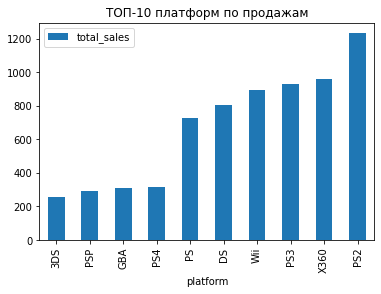

In [33]:
top_10 = data.pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(by='total_sales').tail(10)
top_10.plot(kind='bar',title='ТОП-10 платформ по продажам')

Наибольшее число копий было продано на платформе **PS2**, продажи которой начались с 2000г.
Стоит отметить, что мы брали платформы с наибольшими продажами с 1980г., сюда не вошли новые платформы (так как по им мало данных), что в данном случае не так важно, поскольку нам необходимо отследить жизненный цикл платформ.

Построим графики для 10 платформ, с наибольшими продажами.

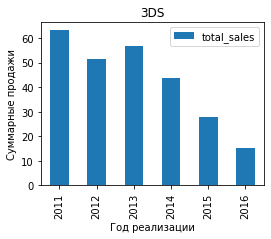

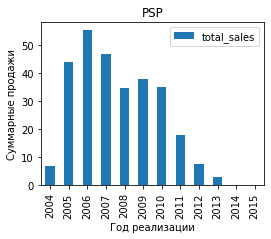

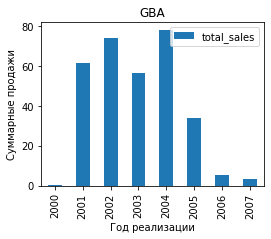

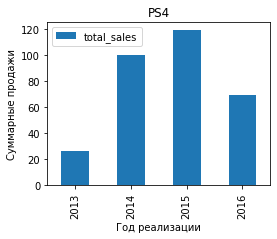

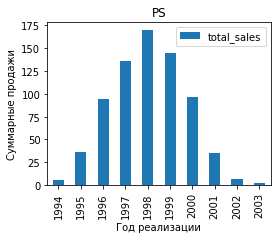

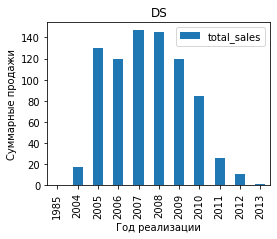

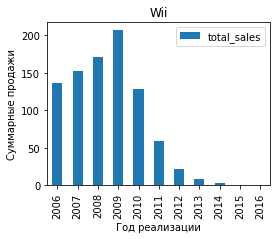

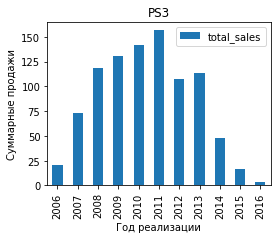

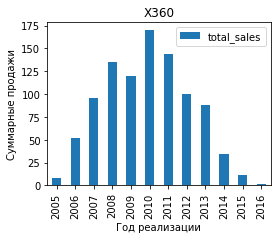

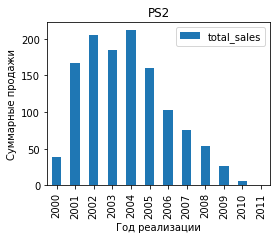

In [34]:
top_10 = top_10.reset_index()
for platform in top_10['platform']:
    data[data['platform'] == platform].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')\
    .plot(kind='bar',xlabel='Год реализации',ylabel='Суммарные продажи',figsize=(4,3),title=platform) #построим 10 сводных таблиц, для каждой платформы нарисуем график

Как мы можем заметить, что в среднем консоли существуют 10 лет. Вероятно, компании делают новую версию, а предыдущие со временем невозможно использовать, либо их перестают принимать в ремонт.
Например, PlayStation была выпущена в 1994г., PS2 - 2000г., PS3 - 2006г., PS4 - 2013г.

###  Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Для прогноза на 2017г. будет целесообразно использовать предыдущие три года **(2014, 2015, 2016)**, поскольку жизненный цикл консоли короткий, нужно брать лишь те консоли, которые продолжают продавать игры сейчас. Сформируем новый датафрейм `df`, который будет отражать актуальный период.

In [35]:
df = data.loc[data['year_of_release'] >= 2014]
#df['year_of_release'].unique()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,<NA>,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.1,0.74,<NA>,NaN,<NA>,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,<NA>,7.98


###  Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Построим график продаж игр на платформах по годам.

<AxesSubplot:title={'center':'Продажи на платформах с 2014 по 2016гг.'}, xlabel='Год реализации', ylabel='Суммарные продажи'>

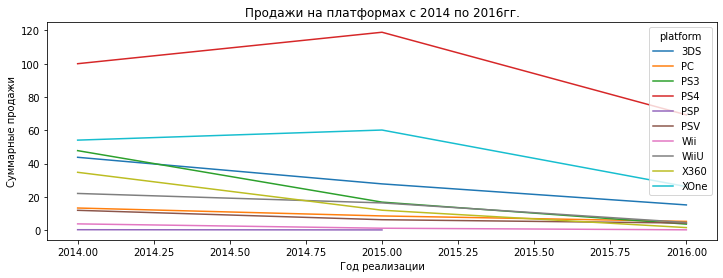

In [36]:
df.pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum')\
.plot(figsize=(12,4),xlabel='Год реализации',ylabel='Суммарные продажи',title='Продажи на платформах с 2014 по 2016гг.')

In [37]:
df.pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum') #выведем таблицу продаж за последние три года

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Как мы можем увидеть, к 2016г. абсолютно на всех консолях сокращались продажи. Наилучшие показатели демонстрирует **PS4, XOne и 3DS**. Легендарная консоль PSP прекратила продажи с 2015г. (пропусков в колонке total_sales таблицы df, не было, соответственно, NaN в 2016г., говорит об отсутствии продаж). Остальные консоли, очевидно, прибыли не принесут.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Text(0.5, 1.0, 'Глобальные продажи игр в разбивке по платформам')

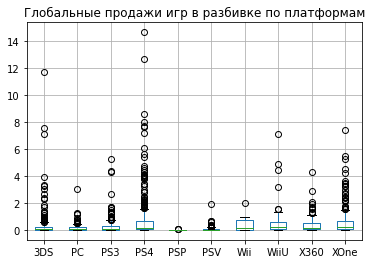

In [38]:
df.pivot_table(index='name',columns='platform',values='total_sales',aggfunc ='sum').boxplot()
plt.title('Глобальные продажи игр в разбивке по платформам')

Установим границы графика, чтобы увидеть медианные значения.

(0.1, 2.0)

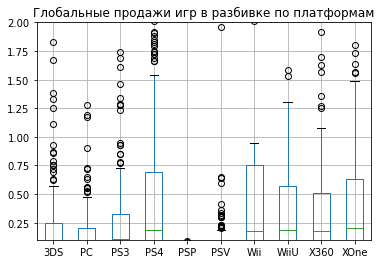

In [39]:
df.pivot_table(index='name',columns='platform',values='total_sales',aggfunc ='sum').boxplot()
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.ylim(0.1,2) #скорректируем границы, чтобы увидеть медианы

Найдем **игры с рекордными** продажами на PS4 и 3DS

In [40]:
game_sales = df.pivot_table(index='name',columns='platform',values='total_sales',aggfunc ='sum')
game_sales[(game_sales['PS4'] > 12) | (game_sales['3DS'] > 10)]

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,
Call of Duty: Black Ops 3,NaN,0.26,1.69,14.63,NaN,NaN,NaN,NaN,1.7,7.39
Grand Theft Auto V,NaN,1.17,NaN,12.62,NaN,NaN,NaN,NaN,NaN,5.47
Pokemon Omega Ruby/Pokemon Alpha Sapphire,11.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df.pivot_table(index='name',columns='platform',values='total_sales',aggfunc ='sum').describe()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,212.000000,151.000000,219.000000,376.000000,13.000000,295.000000,11.000000,73.000000,111.000000,228.000000
mean,0.408868,0.179139,0.311324,0.766356,0.027692,0.075932,0.460909,0.588767,0.434414,0.615614
std,1.188368,0.329359,0.633059,1.614969,0.027735,0.141591,0.625451,1.161467,0.628967,1.046513
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.030000,0.020000,0.040000,0.057500,0.010000,0.020000,0.035000,0.050000,0.070000,0.050000
50%,0.090000,0.060000,0.110000,0.185000,0.020000,0.040000,0.180000,0.190000,0.180000,0.205000
75%,0.250000,0.200000,0.325000,0.690000,0.020000,0.090000,0.755000,0.570000,0.505000,0.632500
max,11.680000,3.050000,5.270000,14.630000,0.090000,1.960000,2.010000,7.090000,4.280000,7.390000


 На графиках указаны частые выбросы. Они нам могут сказать лишь о том, что какие-то игры очень популярны и поэтому продажи по ним высокие. 
 
 Распределение значений положительно скошено, поскольку медианы находятся ближе к основаниям ящиков, а усы короче на нижнем конце ящика. Среднее значение больше медианного. Правосторонняя ассиметрия может сказать о том, что идет прогрессивное развитие, идет "увелечение показателя", поскольку мы заинтересованы в том, чтобы продаж было больше.
 
 По первому графику "ящик с усами" можно увидеть, что рекордные продажи копий наблюдались на платформе PS4 (более 14 млн. копий). Высокий уровень продаж, также показывают игры на японской консоли 3DS (около 12 млн. копий). Самая популярная игра на PS4 *Call of Duty: Black Ops 3*, на 3DS -*Pokemon Omega Ruby/Pokemon Alpha Sapphire*. Результаты выглядят реалистично. Названия этих игр известны практически каждому.
 
 Отметим что, самые высокие медианные значения показывают консоли: PS4, Wii, WiiU, X360, XOne. В данном случае информация о динамике продаж (особенно данные 2016г.) является более важной, поэтому в лидерах по-прежнему оставим:  PS4, XOne и 3DS.
    
    

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

**Найдем корреляцию между отзывами и продажами на платформе PS4.**

In [42]:
ps4 = df.query('platform == "PS4"')
ps4['total_sales'].corr(ps4['critic_score'].astype('float64'))
print('Корреляция продаж к оценкам критиков:', ps4['total_sales'].corr(ps4['critic_score'].astype('float64')))
print('Корреляция продаж к оценкам пользователей:', ps4['total_sales'].corr(ps4['user_score']))

Корреляция продаж к оценкам критиков: 0.40266141068104083
Корреляция продаж к оценкам пользователей: -0.040131589472697356


In [43]:
ps4.info() #посмотрим на размер выборки для расчета

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 31 to 16585
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             376 non-null    string 
 1   platform         376 non-null    string 
 2   year_of_release  376 non-null    Int64  
 3   genre            376 non-null    string 
 4   na_sales         376 non-null    Float64
 5   eu_sales         376 non-null    Float64
 6   jp_sales         376 non-null    Float64
 7   other_sales      376 non-null    Float64
 8   critic_score     237 non-null    Int64  
 9   user_score       242 non-null    float64
 10  rating           240 non-null    string 
 11  total_sales      376 non-null    float64
dtypes: Float64(4), Int64(2), float64(2), string(4)
memory usage: 40.4 KB


**Построим диаграмму рассеяния:**

<AxesSubplot:title={'center':'Зависимость продаж от отзывов критиков PS4'}, xlabel='Оценка критиков', ylabel='Суммарные продажи'>

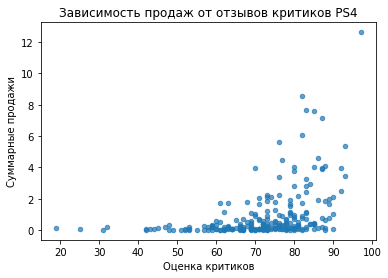

In [44]:
ps4.plot(x='critic_score',y='total_sales',kind='scatter',alpha=0.7,ylabel='Суммарные продажи',\
    xlabel='Оценка критиков',title='Зависимость продаж от отзывов критиков PS4')

<AxesSubplot:title={'center':'Зависимость продаж от оценок пользователей PS4'}, xlabel='Оценка пользователей', ylabel='Суммарные продажи'>

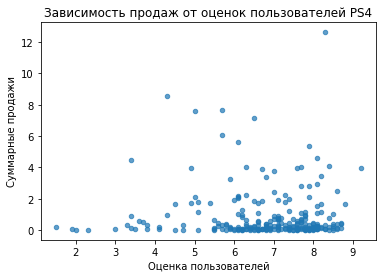

In [45]:
ps4.plot(x='user_score',y='total_sales',kind='scatter',alpha=0.7,ylabel='Суммарные продажи',\
    xlabel='Оценка пользователей',title='Зависимость продаж от оценок пользователей PS4')

По коэффициентам корреляции можно сказать, что в данном случае зависимость продаж от оценки критиков больше, чем от оценок пользователей. В целом наблюдается слабая корреляционныя зависимость. Проверим, коэффициенты корреляции на других перспективных платформах.

### Соотнесите выводы с продажами игр на других платформах.

**Найдем коэффициенты корреляции по другим платформам. Выберем 4 платформы с наибольшими продажами.**

In [46]:
top_platform = ['XOne','3DS','PC','WiiU']
for platform in top_platform:
    df_pl = df.query('platform == @platform')
    print(platform)
    print('Корреляция продаж к оценкам критиков:', df_pl['total_sales'].corr(df_pl['critic_score'].astype('float64')))
    print('Корреляция продаж к оценкам пользователей:', df_pl['total_sales'].corr(df_pl['user_score']))
    #df_pl.info()

XOne
Корреляция продаж к оценкам критиков: 0.42867694370333226
Корреляция продаж к оценкам пользователей: -0.0703839280647581
3DS
Корреляция продаж к оценкам критиков: 0.31411749286905105
Корреляция продаж к оценкам пользователей: 0.2151932718527028
PC
Корреляция продаж к оценкам критиков: 0.17463413769350036
Корреляция продаж к оценкам пользователей: -0.07159665703472452
WiiU
Корреляция продаж к оценкам критиков: 0.370201412480884
Корреляция продаж к оценкам пользователей: 0.4079264579217078


**Построим диаграммы рассеяния по 4 платформам, где покажем взаимосвязь продаж и отзывов критиков.**

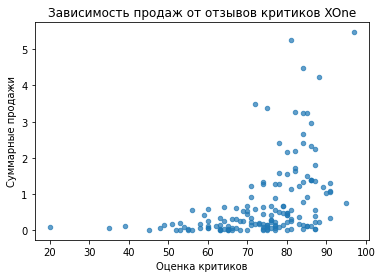

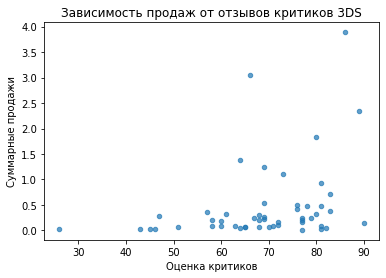

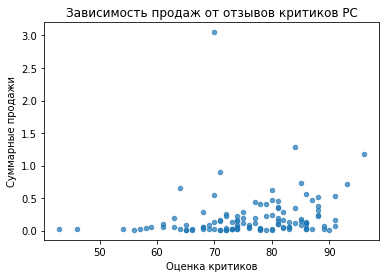

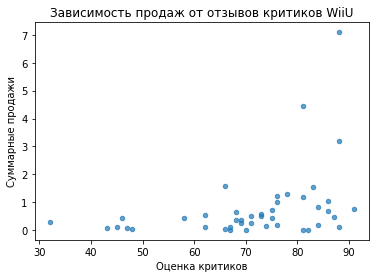

In [47]:
for platform in top_platform:
    df_pl = df.query('platform == @platform')
    df_pl.plot(x='critic_score',y='total_sales',kind='scatter',alpha=0.7,ylabel='Суммарные продажи',\
    xlabel='Оценка критиков',title='Зависимость продаж от отзывов критиков '+platform)
  

**Построим диаграммы рассеяния по 4 платформам, где покажем взаимосвязь продаж и отзывов пользователей.**

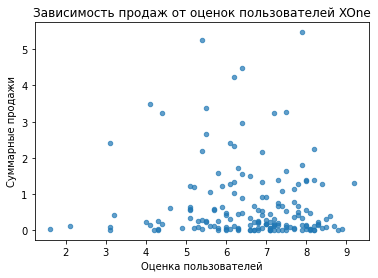

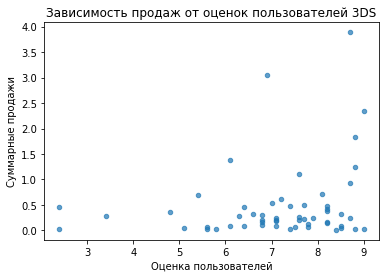

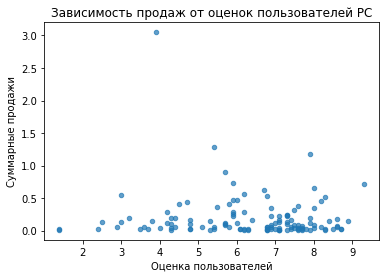

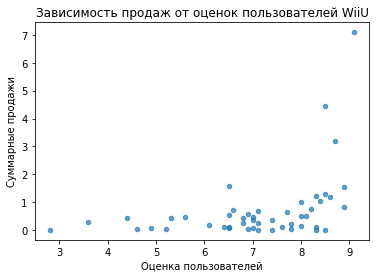

In [48]:
for platform in top_platform:
    df_pl = df.query('platform == @platform')
    df_pl.plot(x='user_score',y='total_sales',kind='scatter',alpha=0.7,ylabel='Суммарные продажи',\
    xlabel='Оценка пользователей',title='Зависимость продаж от оценок пользователей '+platform)

Рассчитав коэф. корреляции по другим платформам мы можем отметить схожесть показателей на PS4, PC, XOne:
-  Слабая отрицательная корреляционную зависимость между оценками пользователей и числом продаж.
-  Слабая положительная корреляционную зависимость между оценками критиков и числом продаж.
-  Зависимость продаж от оценок критиков сильнее, чем от оценок пользователей.

В моем понимании оценка критиков дается на более ранней стадии, чем формируется оценка пользователей. Поэтому я думаю, что взаимосвязь количества проданных копий за определенный период и отзывов критиков сильнее.

Корреляция продаж к оценкам критиков у платформ 3DS и WiiU также имеет схожее значение с показателями PS4. Однако здесь мы наблюдаем слабую *положительную* корреляционную зависимость между оценками пользователей и числом продаж.

Стоит также отметить, что выборки по платформам 3DS и WiiU меньше, чем на др. платформах.

На графиках мы можем увидеть слабую корр. связь между двумя показателями, а также большое количество выбивающихся значений.

**Отразим на графике оценки критиков и пользователей на самых перспективных платформах**

Text(0.5, 1.0, 'Рейтинги критиков самых перспективных платформ')

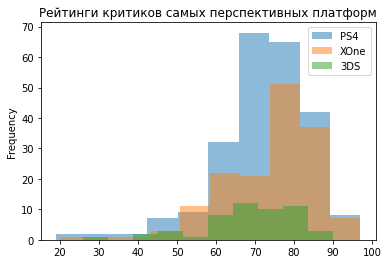

In [49]:
x_one = df.query('platform == "XOne"')
ds3 = df.query('platform == "3DS"')

ps4['critic_score'].plot(kind='hist',alpha=0.5,label='PS4')
x_one['critic_score'].plot(kind='hist',alpha=0.5,label='XOne')
ds3['critic_score'].plot(kind='hist',alpha=0.5,label='3DS')
plt.legend()
plt.title('Рейтинги критиков самых перспективных платформ')

Text(0.5, 1.0, 'Рейтинги пользователей самых перспективных платформ')

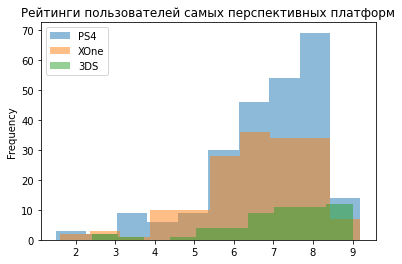

In [50]:
ps4['user_score'].plot(kind='hist',alpha=0.5,label='PS4')
x_one['user_score'].plot(kind='hist',alpha=0.5,label='XOne')
ds3['user_score'].plot(kind='hist',alpha=0.5,label='3DS')
plt.legend()
plt.title('Рейтинги пользователей самых перспективных платформ')

Стоит также отметить, что рейтинги платформ преимущественно высокие:
-  Рейтинг среди пользователей больше 5,5;
-  Рейтинг среди критиков больше 60.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Построим круговую диаграмму, в которой отразим количество выпущенных игр под разными жанрами.**

<AxesSubplot:title={'center':'Распределение продаваемых игр по жанрам'}, ylabel='total_sales'>

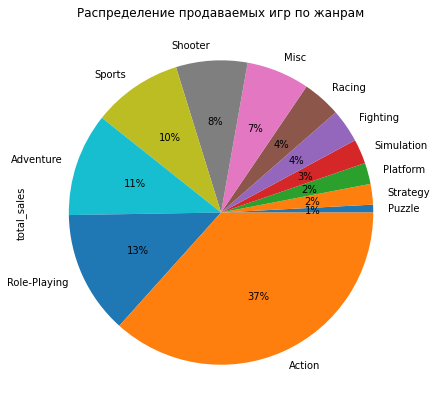

In [51]:
df.pivot_table(index='genre',values='total_sales',aggfunc='count').sort_values(by='total_sales')\
.plot(kind='pie',y='total_sales',figsize=(7,7),legend=False,autopct='%1.0f%%',title=('Распределение продаваемых игр по жанрам'))

**Чаще всего выпускают игры в следующих жанрах:**
-  Action - 37%
-  Role-Playing - 13%
-  Adventure - 11%
-  Sports - 10%

**Меньше всего выпускают игры в жанре:**
-  Puzzle - 1%
-  Strategy - 2%
-  Platform - 2%

**Построим круговую диаграмму по количеству проданных копий по жанрамю**

<AxesSubplot:title={'center':'Распределение (суммарных) продаж по жанрам'}, ylabel='total_sales'>

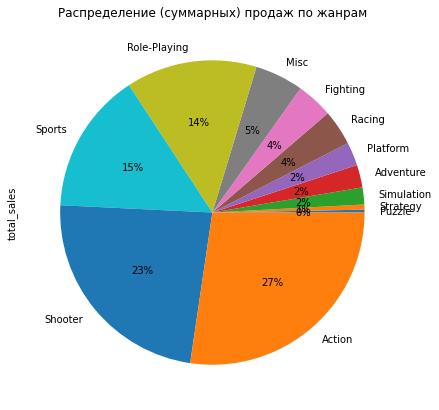

In [52]:
df.pivot_table(index='genre',values='total_sales',aggfunc='sum').sort_values(by='total_sales')\
.plot(kind='pie',y='total_sales',figsize=(7,7),legend=False,autopct='%1.0f%%',title='Распределение (суммарных) продаж по жанрам')

**Больше всего копий было продано в следующих жанрах:**
-  Action - 27%
-  Shooter - 23%
-  Sports - 15%
-  Role-Playing - 14%

**Меньше всего копий было продано в следующих жанрах:**
-  Strategy - 1%
-  Puzzle - около 0%

Посмотрим на соотнесение выпуска игр и объемов проданных копий:
1. Игры в жанре Action составляю 37% от всех выпущенных игр, однако на них приходится лишь 27% от проданных копий по всем жанрам.
2. На 8% всех выпущенных игр приходится 23% проданных копий в жанре Shooter.
3. Можно сказать, что игры в жанре Shooter более качественные и успешные. Производить их гораздо прибыльнее. 
4. Adventure занимают второе место по выпуску, что неоправданно, поскольку продажи в этой категории занимают 2% по миру.

Мы помним, что в данных встречались редкие выбивающиеся значения. Как, например, игра *Call of Duty: Black Ops 3* , которая только на одной платформе PS4 была продана более 14 млн. раз. Попробуем построить график по жанрам, в котором отразим не суммарные продажи, а их медианные значения.

<AxesSubplot:title={'center':'Распределение (медиан) продаж по жанрам'}, ylabel='total_sales'>

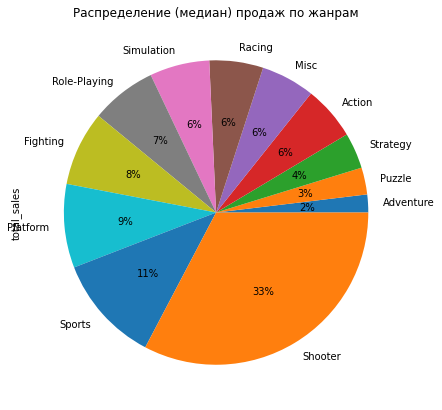

In [53]:
df.pivot_table(index='genre',values='total_sales',aggfunc='median').sort_values(by='total_sales')\
.plot(kind='pie',y='total_sales',figsize=(7,7),legend=False,autopct='%1.0f%%',title='Распределение (медиан) продаж по жанрам')

<AxesSubplot:>

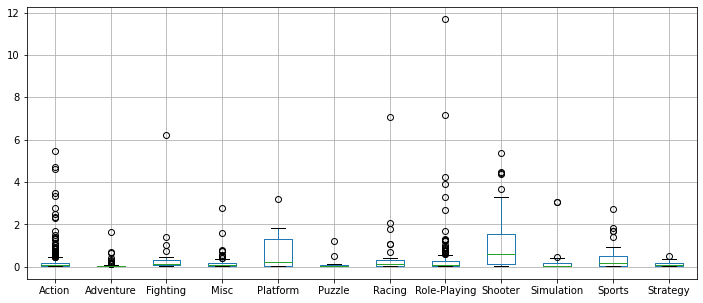

In [54]:
df.pivot_table(index='name',columns='genre',values='total_sales',aggfunc='median').boxplot(figsize=(12,5))

Теперь у нас появился новый лидер: **жанр Shooter занимает 33% от общих продаж**, при выпускаемом количестве - 8% от всех игр. Это подтверждает наши предположения, что данный жанр самый успешный.

Жанр **Sport** идет относительно ровно: на 10% выпуска приходится 11% продаж.

Хорошие показатели демонстрируют жанры **Fighting** (4% выпуска на 8% продаж)и **Platform** (2% выпуска на 9% продаж).

Жанр **Action** теперь занимает не 27% продаж, а лишь 6%, что может говорить о том, что "выстреливших игр" было очень мало среди всех выпущенных. Получается, что 37% всех выпущенных игра покрывает лишь 6% продаж.
Аналогичная ситуация произошла и с жанрами **Adventure** (11% игр на 2% продаж) и **Role-Playing** (13% игр на 7% продаж).

По диаграмме  размаха мы можем увидеть, что самое большое число выбросов наблюдается в жанре Role-Playing и Action.


## Составьте портрет пользователя каждого региона

### Определите для пользователя каждого региона (NA, EU, JP):
-  Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?


**Портрет пользователя из Северной Америки.**

Построим график распределения продаж по платформам.

<AxesSubplot:title={'center':'Распределение продаж по платформам в Северной Америке'}, xlabel='platform'>

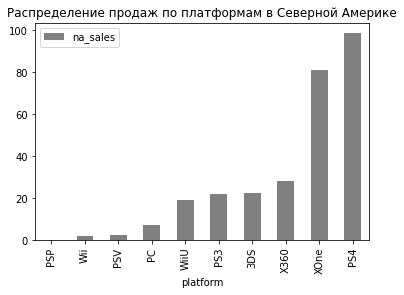

In [55]:
df.pivot_table(index='platform',values='na_sales',aggfunc='sum').sort_values(by='na_sales')\
.plot(kind='bar',color='grey',title='Распределение продаж по платформам в Северной Америке')


In [56]:
na = df.pivot_table(index='platform',values='na_sales',aggfunc='sum')
na['shape_sales'] = na['na_sales'] / na['na_sales'].sum() * 100
na['shape_sales'] = na['shape_sales'].astype(float).round(2)
print('Топ-5 платформ Северной Америки:')
na.sort_values(by='shape_sales',ascending=False).head()

Топ-5 платформ Северной Америки:


,na_sales,shape_sales
platform,,
PS4,98.61,34.71
XOne,81.27,28.61
X360,28.3,9.96
3DS,22.64,7.97
PS3,22.05,7.76


Построим график распределения продаж по жанрам:

<AxesSubplot:title={'center':'Распределение продаж по жанрам в Северной Америке'}, ylabel='na_sales'>

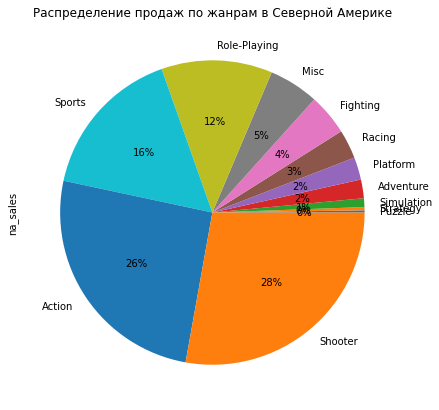

In [57]:
df.pivot_table(index='genre',values='na_sales',aggfunc='sum').sort_values(by='na_sales')\
.plot(kind='pie',y='na_sales',figsize=(7,7),legend=False,autopct='%1.0f%%',title='Распределение продаж по жанрам в Северной Америке')

In [58]:
na1 = df.pivot_table(index='genre',values='na_sales',aggfunc='sum')
na1['shape_sales'] = na1['na_sales'] / na1['na_sales'].sum() * 100
na1['shape_sales'] = na1['shape_sales'].astype(float).round(2)
print('Топ-5 игровых жанров Северной Америки:')
na1.sort_values(by='shape_sales',ascending=False).head()

Топ-5 игровых жанров Северной Америки:


,na_sales,shape_sales
genre,,
Shooter,79.02,27.82
Action,72.53,25.53
Sports,46.13,16.24
Role-Playing,33.47,11.78
Misc,15.05,5.30


**Пользователь Америки:**
1.  Чаще всего покупает игры на японской платформе PS4 (35%)  и американской XOne (29%).
2. Отдает предпочтение играм в жанре Shooter, Action, Sports.
3. Слабо интересуется жанрами Puzzle, Strategy

**Портрет пользователя из Европы.**

Построим график распределения продаж по платформам.

<AxesSubplot:title={'center':'Распределение продаж по платформам в Европе'}, xlabel='platform'>

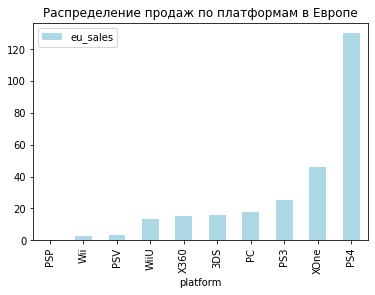

In [59]:
df.pivot_table(index='platform',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales')\
.plot(kind='bar',title='Распределение продаж по платформам в Европе',color='lightblue')

In [60]:
eu = df.pivot_table(index='platform',values='eu_sales',aggfunc='sum')
eu['shape_sales'] = eu['eu_sales'] / eu['eu_sales'].sum() * 100
eu['shape_sales'] = eu['shape_sales'].astype(float).round(2)
print('Топ-5 платформ Европы:')
eu.sort_values(by='shape_sales',ascending=False).head()

Топ-5 платформ Европы:


,eu_sales,shape_sales
platform,,
PS4,130.04,48.04
XOne,46.25,17.09
PS3,25.54,9.44
PC,17.97,6.64
3DS,16.12,5.96


Построим график распределения продаж по жанрам:

<AxesSubplot:title={'center':'Распределение продаж по жанрам в Европе'}, ylabel='eu_sales'>

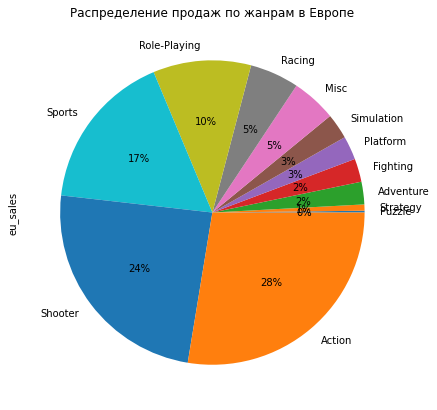

In [61]:
df.pivot_table(index='genre',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales')\
.plot(kind='pie',y='eu_sales',figsize=(7,7),legend=False,autopct='%1.0f%%',title='Распределение продаж по жанрам в Европе')

In [62]:
eu1 = df.pivot_table(index='genre',values='eu_sales',aggfunc='sum')
eu1['shape_sales'] = eu1['eu_sales'] / eu1['eu_sales'].sum() * 100
eu1['shape_sales'] = eu1['shape_sales'].astype(float).round(2)
print('Топ-5 жанров Европы:')
eu1.sort_values(by='shape_sales',ascending=False).head()

Топ-5 жанров Европы:


,eu_sales,shape_sales
genre,,
Action,74.68,27.59
Shooter,65.52,24.21
Sports,45.73,16.89
Role-Playing,28.17,10.41
Racing,14.13,5.22


**Пользователь Европы:**
1. Предпочитает пользоваться японской консолью PS4 (46%) и американской XOne (16%)
2. Как и американское пользователи любит жарны Shooter, Action, Sports.
3. Редко покумает игры в жарне Puzzle, Strategy

**Портрет пользователя из Японии.**

Построим график распределения продаж по платформам.

<AxesSubplot:title={'center':'Распределение продаж по платформам в Европе'}, xlabel='platform'>

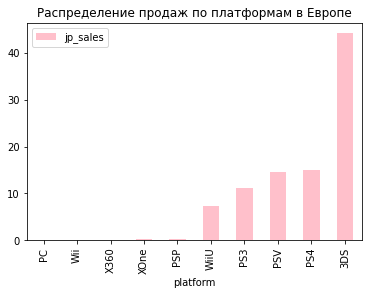

In [63]:
df.pivot_table(index='platform',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales')\
.plot(kind='bar',title='Распределение продаж по платформам в Европе',color='pink')

In [64]:
jp = df.pivot_table(index='platform',values='jp_sales',aggfunc='sum')
jp['shape_sales'] = jp['jp_sales'] / jp['jp_sales'].sum() * 100
jp['shape_sales'] = jp['shape_sales'].astype(float).round(2)
print('Топ-5 платформ Японии:')
jp.sort_values(by='shape_sales',ascending=False).head()

Топ-5 платформ Японии:


,jp_sales,shape_sales
platform,,
3DS,44.24,47.52
PS4,15.02,16.13
PSV,14.54,15.62
PS3,11.22,12.05
WiiU,7.31,7.85


Построим график распределения продаж по жанрам.

<AxesSubplot:title={'center':'Распределение продаж по жанрам в Японии'}, ylabel='jp_sales'>

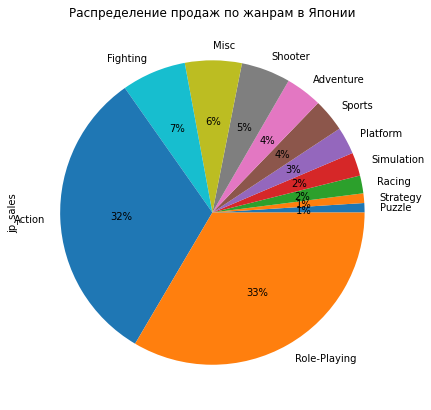

In [65]:
df.pivot_table(index='genre',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales')\
.plot(kind='pie',y='jp_sales',figsize=(7,7),legend=False,autopct='%1.0f%%',title='Распределение продаж по жанрам в Японии')

In [66]:
jp1 = df.pivot_table(index='genre',values='jp_sales',aggfunc='sum')
jp1['shape_sales'] = jp1['jp_sales'] / jp1['jp_sales'].sum() * 100
jp1['shape_sales'] = jp1['shape_sales'].astype(float).round(2)
print('Топ-5 жанров Японии:')
jp1.sort_values(by='shape_sales',ascending=False).head()

Топ-5 жанров Японии:


,jp_sales,shape_sales
genre,,
Role-Playing,31.16,33.47
Action,29.58,31.78
Fighting,6.37,6.84
Misc,5.61,6.03
Shooter,4.87,5.23


**Пользователь Японии:**
- покупает игры на отечественных платформах. Самой популярной является 3DS. Занимает 48% продаж.
- чаще всего покупает игры в жанре Role-Playing и Action
- меньше всего интересуется жанрами Puzzle, Strategy

**Определим влияет ли рейтинг ESRB на продажи в отдельном регионе.**

Для этого построим таблицу, содержащую данные по продажам игр различных категорий по группам стран. 

Помним, что в колонке с рейтингом ESBR было много пропусков, заменим его на `No ESBR`, чтобы не упустить важные данные.

In [67]:
df['rating'] = df['rating'].fillna('No ESRB')
df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

/tmp/ipykernel_49/3028578994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].fillna('No ESRB')


,na_sales,eu_sales,jp_sales
rating,,,
E,50.74,58.06,8.94
E10+,33.23,26.16,4.46
M,96.42,93.44,8.01
No ESRB,64.72,58.95,56.9
T,38.95,34.07,14.78


In [68]:
df['rating'].unique()

<StringArray>
['No ESRB', 'M', 'E', 'T', 'E10+']
Length: 5, dtype: string

Построи график распределения продаж игр с различным рейтингом ESBR по регионам.

Text(0.5, 1.0, 'Распределение проданных игр по возрастному рейтингу и региону')

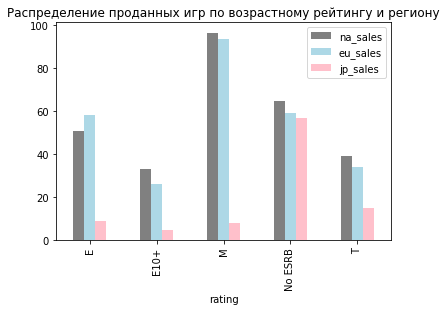

In [69]:
df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().plot(kind='bar', color=('grey','lightblue','pink'))
plt.title('Распределение проданных игр по возрастному рейтингу и региону')

В Европе и Северной Америке чаще всего продают игры категории `M` (для взрослых).
Для большинства проданных игр в Японии рейтинг ESBR не определен.Думаю, это связано с тем, что культура Японии сильно отличается от стран Северной Америки и Европы, а также в Японии возрастной рейтинг играм выставляет местная компания CERO (с 2002г.).Также стоит отметить, что по правилам ESBR запрещено размещать обозначения других рейтинговых систем вместе с их знаком где бы то ни было.

## Шаг 5. Проверьте гипотезы

### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


Н0 = Средние пользовательские рейтинги платформ Xbox One и PC равны.

H1 = Средние пользовательские рейтинги платформ Xbox One и PC не равны.

Уровень статистической значимости установим на уровне - 0,5.

In [70]:
x_one = df[(df['platform'] == 'XOne') & (df['user_score'] > 0)]['user_score']
pc = df[(df['platform'] == 'PC') & (df['user_score'] > 0)]['user_score']

print('Средний пользовательский рейтинг платформы XOne:', x_one.mean())
print('Средний пользовательский рейтинг платформы PC', pc.mean())

alpha = .05

results = st.ttest_ind(x_one, pc, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг платформы XOne: 6.594545454545456
Средний пользовательский рейтинг платформы PC 6.298360655737705
p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


*Гипотезу о том,что средние пользовательские рейтинги платформ Xbox One и PC равны не получилось отвергнуть.*

### **Гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Н0 = Средние пользовательские рейтинги жанров Action и Sports равны.

H1 = Средние пользовательские рейтинги жанров Action и Sports не равны.

Уровень статистической значимости установим на уровне - 0,5.

In [71]:
action = df[(df['genre'] == 'Action') & (df['user_score'] > 0)]['user_score']
sports = df[(df['genre'] == 'Sports') & (df['user_score'] > 0)]['user_score']

print('Средний пользовательский рейтинг жанра Action:', action.mean())
print('Средний пользовательский рейтинг жанра Sports', sports.mean())

alpha = .05

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг жанра Action: 6.760606060606061
Средний пользовательский рейтинг жанра Sports 5.2251968503937
p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


*Гипотеза о том,что средние пользовательские рейтинги жанров Action и Sports разные подтвердилась.*

Нулевую гипотезу сформулировали исходя из того, что это утверждение, которое необходимо проверить. В данном случае выдвигаем гипотезу о том, что "средние пользовательские рейтинги жанров Action и Sports равны" и "средние пользовательские рейтинги платформ Xbox One и PC равны". 

Альтернативную гипотезу выдвигаем как противоположное утверждение нулевой гипотезе. В нашем случае "средние пользовательские рейтинги жанров Action и Sports не равны", "средние пользовательские рейтинги платформ Xbox One и PC не равны."

Гипотезы являются двусторонними, поскольку нам не важно, больше или меньше эти рейтинги.

Для проверки гипотез о равенстве среднего двух генеральных совокупностей по взятым из них выборкам мы использовали метод st.ttest_ind. Где указали параметр equal_var=False - который не позволит считать равными дисперсии выборок.

Уровень значимости нам не был задан, поэтому использовала стандартное значение - 5%.

P-value - вероятность получить значение равное наблюдаемому при условии , что гипотеза верна. Получается, что если P-value будет меньше, чем уровень значимости, то мы отвергаем нулевую гипотезу (при заданном уровне значимости). Во второй гипотезе у нас сложилась такая ситуация, то есть при уровне значимости в 5% нам пришлось отвергнуть нулевую гипотезу, что позволило нам согласиться на альтернативную гипотезу "Средние пользовательские рейтинги жанров Action и Sports не равны".

В первой гипотезе P-value был больше, чем заданный уровень значимости, что не позволило нам отвергнуть нулевую гипотезу. По результатам проверки статистической гипотезы мы никогда не можем сделать вывод о том, что она должна быть принята.

**ВЫВОД**
1. На основе имеющихся данных гипотезу при уровне значимости в 5% о том,что средние пользовательские рейтинги платформ Xbox One и PC равны не получилось отвергнуть. Значит, есть вероятность того, что пользователи двух платформ выставляют схожие средние оценки.
2. На основе имеющихся данных гипотезу при уровне значимости в 5% о том,что средние пользовательские рейтинги жанров Action и Sports разные подтвердилась. Рейтинг игр в жанре Sport отличен от рейтинга жанра Action. 

##  Напишите общий вывод

Мы изучили исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы и можем сделать следующие выводы:
1. Игровые платформы существуют в среднем 10 лет. 
2. Большое количество пропусков в рейтингах связано с тем, что оценки выставляют преимущественно новым выпущенным играм. Пропуски в рейтинге критиков могут говорить о том, что игра не популярная и "неинтересна" критикам. Отсутствие рейтинга ESBR скорее говорит о том, что игры выпущены не в США. У стран Европы и Японии есть свои возрастные рейтинги.  
3. До 2009г. в количестве выпущенных игр из года в год росло. После 2009г. восходящий тренд был сломлен. 
4. Рекордное число копий было продано на платформе PS2.
5. Наиболее перспективными платформами на сегодня принято считать **PS4, XOne и 3DS**.
6. В данных по продажам встречается много аномалий, что говорит о том, что были "вирусные" игры, которые пользовались большой популярностью.
6. В актуальном периоде рекордные продажи копий наблюдались на платформе PS4 (более 14 млн. копий). Высокий уровень продаж, также показывают игры на японской консоли 3DS (около 12 млн. копий). Самая популярная игра на PS4 *Call of Duty: Black Ops 3*, на 3DS -*Pokemon Omega Ruby/Pokemon Alpha Sapphire*.
6. Коррялиционная зависимость продаж от оценок критиков сильнее, чем от оценок пользователей.
7. *Рейтинги платформ преимущественно высокие*: среди пользователей больше 5,5, среди критиков больше 60.
8. Чаще всего выпускают игры в жанрах: Action - 37%, Role-Playing -13%, Adventure - 11%, Sports - 10%. Реже всего выпускают игры в жанрах: Puzzle - 1%, Strategy - 2%, Platform - 2%.
9. Больше всего копий было продано в следующих жанрах: **Action - 27%, Shooter - 23%, Sports - 15%, Role-Playing - 14%**. Меньше всего копий было продано в следующих жанрах: Strategy - 1%, Puzzle - около 0%.
10. Лидер среди успешных жанров **Shooter - занимает 33% от общих продаж**, при выпускаемом количестве - 8% от всех игр. Также хорошо продается жанр **Sport**: на 10% выпуска приходится 11% продаж.
11. Жанр **Action** занимает 37% среди всех выпущенных игра покрывает лишь 6% продаж. Аналогичная ситуация произошла и с жанрами **Adventure** (11% игр на 2% продаж) и **Role-Playing** (13% игр на 7% продаж). Что не делает их "неудачными" жанрами для продажи. Однако Role-Playing популярен в Японии.
12. Пользователи из  Америки чаще всего покупают игры на японской платформе PS4 (35%) и американской XOne (29%). Европейцы предпочитают пользоваться японской консолью PS4 (46%) и американской XOne (16%). Японцы покупают игры на отечественных платформах (самая популярная 3DS - 48% продаж).
13. У пользователей из Северной Америки и Европы схожие вкусы на игры. Самые популярные жанры: Shooter, Action, Sports.
14. Японцы чаще всего покупает игры в жанре Role-Playing и Action.
15. Редким явлением для пользователей всех регионов является покупка игр в жанрах Puzzle, Strategy.
16. Рейтинг ESBR влияет на продажи в отдльных регионах. Так, например, в странах Северной Америки и Европе больше всего продаж в категории М (для взрослых). Для большинства игр в Японии рейтинг ESBR не определен. В Японии существует своя система возрастной оценки игр (CERO). 
17. На основе имеющихся данных гипотезу при уровне значимости в 5% о том,что средние пользовательские рейтинги платформ Xbox One и PC равны не получилось отвергнуть. 
18. На основе имеющихся данных гипотезу при уровне значимости в 5% о том,что средние пользовательские рейтинги жанров Action и Sports разные подтвердилась. 

**Рекламный бюджет компании лучше потратить:**
- на платформы PS4 и XOne.
- большее внимание уделить играм в жанре Shooter и Sport.
- в случае, если нам важна аудитория из Японии, то стоит обратить в нимание на платформу 3DS и жанр Role-Playing.
 
 В Европе и Северной Америке рекламировать игры с рейтингом ESBR - "M". Для пользователей из Японии лучше выбирать отечественные игры(у которых нет рейтинга ESBR).
 
 Средние рейтинги преимущественно высокие и анализ не выявил сильной корреляционной зависимости между рейтингами и продажами. Однако полностью принебрегать ими не стоит. 
